Iris SVM Classifier Accuracy: 1.0
Wine Linear SVM Accuracy: 0.9722222222222222
Wine RBF SVM Accuracy: 1.0
SVR Mean Squared Error: 0.3570026426754463


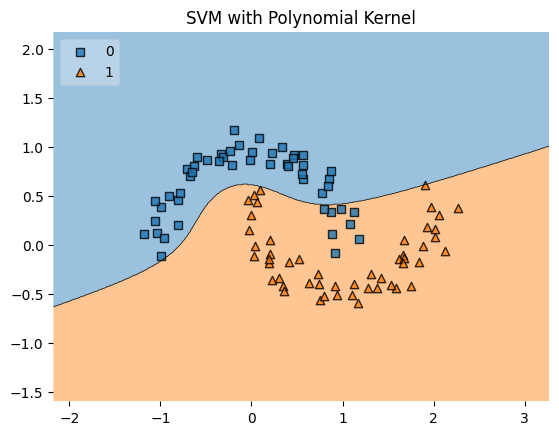

Breast Cancer GaussianNB Accuracy: 0.9649122807017544
20 Newsgroups MultinomialNB Accuracy: 0.7185152452496686


In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# 21. SVM Classifier on Iris Dataset
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)
y_pred = svm_clf.predict(X_test_scaled)
print("Iris SVM Classifier Accuracy:", accuracy_score(y_test, y_pred))

# 22. SVM with Linear and RBF Kernels on Wine Dataset
wine = datasets.load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')
linear_svm.fit(X_train_scaled, y_train)
rbf_svm.fit(X_train_scaled, y_train)
print("Wine Linear SVM Accuracy:", accuracy_score(y_test, linear_svm.predict(X_test_scaled)))
print("Wine RBF SVM Accuracy:", accuracy_score(y_test, rbf_svm.predict(X_test_scaled)))

# 23. SVM Regressor (SVR) on Housing Dataset
boston = datasets.fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
print("SVR Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 24. SVM Classifier with Polynomial Kernel and Decision Boundary
X, y = datasets.make_moons(n_samples=100, noise=0.1, random_state=42)
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X, y)
plot_decision_regions(X, y, clf=poly_svm, legend=2)
plt.title('SVM with Polynomial Kernel')
plt.show()

# 25. Gaussian Naive Bayes on Breast Cancer Dataset
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print("Breast Cancer GaussianNB Accuracy:", accuracy_score(y_test, y_pred))

# 26. Multinomial Naive Bayes for Text Classification
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("20 Newsgroups MultinomialNB Accuracy:", accuracy_score(y_test, y_pred))

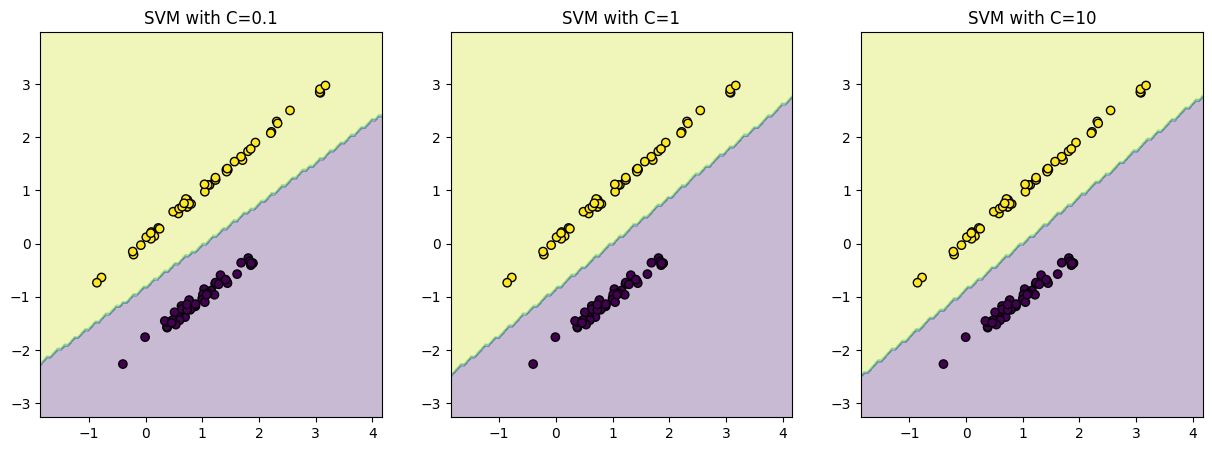

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Plot decision boundaries
C_values = [0.1, 1, 10]
plt.figure(figsize=(15, 5))

for i, C in enumerate(C_values):
    svm = SVC(C=C, kernel='linear')
    svm.fit(X_train, y_train)

    plt.subplot(1, 3, i+1)
    plt.title(f"SVM with C={C}")

    # Decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

plt.show()


In [3]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate binary dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_clusters_per_class=1, random_state=42)
X = (X > 0).astype(int)  # Binary features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.90


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without scaling
svm = SVC()
svm.fit(X_train, y_train)
unscaled_acc = accuracy_score(y_test, svm.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC()
svm_scaled.fit(X_train_scaled, y_train)
scaled_acc = accuracy_score(y_test, svm_scaled.predict(X_test_scaled))

print(f"Unscaled Accuracy: {unscaled_acc:.2f}")
print(f"Scaled Accuracy: {scaled_acc:.2f}")
1

Unscaled Accuracy: 0.95
Scaled Accuracy: 0.97


1

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without Laplace Smoothing
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred1 = gnb.predict(X_test)
acc1 = accuracy_score(y_test, pred1)

# With Laplace Smoothing (var_smoothing parameter)
gnb_smooth = GaussianNB(var_smoothing=1e-8)
gnb_smooth.fit(X_train, y_train)
pred2 = gnb_smooth.predict(X_test)
acc2 = accuracy_score(y_test, pred2)

print(f"Without Smoothing: {acc1:.2f}")
print(f"With Smoothing: {acc2:.2f}")


Without Smoothing: 0.96
With Smoothing: 0.96


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Grid Search
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_:.2f}")


Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best Score: 0.96


In [7]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without class weighting
svm = SVC()
svm.fit(X_train, y_train)
acc_no_weight = accuracy_score(y_test, svm.predict(X_test))

# With class weighting
svm_weighted = SVC(class_weight='balanced')
svm_weighted.fit(X_train, y_train)
acc_weighted = accuracy_score(y_test, svm_weighted.predict(X_test))

print(f"Without Class Weighting: {acc_no_weight:.2f}")
print(f"With Class Weighting: {acc_weighted:.2f}")


Without Class Weighting: 0.91
With Class Weighting: 0.92


In [8]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without class weighting
svm = SVC()
svm.fit(X_train, y_train)
acc_no_weight = accuracy_score(y_test, svm.predict(X_test))

# With class weighting
svm_weighted = SVC(class_weight='balanced')
svm_weighted.fit(X_train, y_train)
acc_weighted = accuracy_score(y_test, svm_weighted.predict(X_test))

print(f"Without Class Weighting: {acc_no_weight:.2f}")
print(f"With Class Weighting: {acc_weighted:.2f}")


Without Class Weighting: 0.91
With Class Weighting: 0.92


In [10]:
#33
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample email dataset
emails = ['Free money now!!!', 'Hi, how are you?', 'Congratulations, you won a prize',
          'Let’s catch up tomorrow', 'Claim your free vacation now', 'Are you free this weekend?']
labels = [1, 0, 1, 0, 1, 0]  # 1 = Spam, 0 = Not Spam

# Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, random_state=42)

# Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Spam Detection Accuracy: {accuracy:.2f}")


Spam Detection Accuracy: 1.00


In [11]:
#34
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# SVM Classifier
svm = SVC()
svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm.predict(X_test))

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb.predict(X_test))

print(f"SVM Accuracy: {svm_acc:.2f}")
print(f"Naive Bayes Accuracy: {nb_acc:.2f}")


SVM Accuracy: 0.95
Naive Bayes Accuracy: 0.96


In [12]:
#35
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without Feature Selection
nb = GaussianNB()
nb.fit(X_train, y_train)
acc_no_fs = accuracy_score(y_test, nb.predict(X_test))

# With Feature Selection
selector = SelectKBest(chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

nb_fs = GaussianNB()
nb_fs.fit(X_train_selected, y_train)
acc_fs = accuracy_score(y_test, nb_fs.predict(X_test_selected))

print(f"Accuracy without Feature Selection: {acc_no_fs:.2f}")
print(f"Accuracy with Feature Selection: {acc_fs:.2f}")


Accuracy without Feature Selection: 0.96
Accuracy with Feature Selection: 0.96


In [14]:
#36
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# One-vs-Rest
ovr = OneVsRestClassifier(SVC())
ovr.fit(X_train, y_train)
ovr_acc = accuracy_score(y_test, ovr.predict(X_test))

# One-vs-One
ovo = OneVsOneClassifier(SVC())
ovo.fit(X_train, y_train)
ovo_acc = accuracy_score(y_test, ovo.predict(X_test))

print(f"OvR Accuracy: {ovr_acc:.2f}")
print(f"OvO Accuracy: {ovo_acc:.2f}")


OvR Accuracy: 0.71
OvO Accuracy: 0.78


In [16]:
#37

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    acc = accuracy_score(y_test, svm.predict(X_test))
    print(f"SVM with {kernel} kernel Accuracy: {acc:.2f}")




SVM with linear kernel Accuracy: 0.96
SVM with poly kernel Accuracy: 0.94
SVM with rbf kernel Accuracy: 0.95


In [17]:
#38
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5)
svm = SVC()

# Cross-validation
scores = cross_val_score(svm, X, y, cv=skf)
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {scores.mean():.2f}")


Cross-Validation Scores: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Average Accuracy: 0.91


In [18]:
#39
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Naive Bayes with different priors
priors = [[0.3, 0.7], [0.5, 0.5], [0.7, 0.3]]
for prior in priors:
    nb = GaussianNB(priors=prior)
    nb.fit(X_train, y_train)
    acc = accuracy_score(y_test, nb.predict(X_test))
    print(f"Priors {prior} -> Accuracy: {acc:.2f}")


Priors [0.3, 0.7] -> Accuracy: 0.96
Priors [0.5, 0.5] -> Accuracy: 0.96
Priors [0.7, 0.3] -> Accuracy: 0.95


In [19]:
#40
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# SVM without RFE
svm = SVC()
svm.fit(X_train, y_train)
acc_no_rfe = accuracy_score(y_test, svm.predict(X_test))

# RFE with SVM
rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)
rfe.fit(X_train, y_train)
acc_rfe = accuracy_score(y_test, rfe.predict(X_test))

print(f"Accuracy without RFE: {acc_no_rfe:.2f}")
print(f"Accuracy with RFE: {acc_rfe:.2f}")


Accuracy without RFE: 0.95
Accuracy with RFE: 0.98


In [20]:
#41
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Hyperparameter grid
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# GridSearchCV
nb = GaussianNB()
grid = GridSearchCV(nb, param_grid, cv=5)
grid.fit(X_train, y_train)

# Best parameters and accuracy
best_nb = grid.best_estimator_
y_pred = best_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {grid.best_params_}")
print(f"Accuracy after Hyperparameter Tuning: {accuracy:.2f}")


Best Parameters: {'var_smoothing': 1e-09}
Accuracy after Hyperparameter Tuning: 0.96


In [21]:
#42
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Introduce missing values
rng = np.random.RandomState(42)
missing_mask = rng.rand(*X.shape) < 0.1  # 10% missing values
X[missing_mask] = np.nan

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=42)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after Handling Missing Values: {accuracy:.2f}")


Accuracy after Handling Missing Values: 0.96


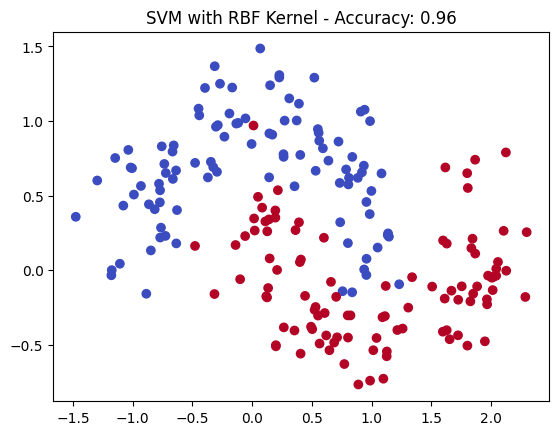

In [22]:
#43
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate non-linearly separable data
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# SVM with RBF kernel
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train, y_train)
accuracy = accuracy_score(y_test, svm.predict(X_test))

# Plot decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title(f"SVM with RBF Kernel - Accuracy: {accuracy:.2f}")
plt.show()


In [24]:
#44
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy on Iris Dataset: {accuracy:.2f}")


Naive Bayes Accuracy on Iris Dataset: 1.00


In [25]:
#45
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# SVM without PCA
svm = SVC()
svm.fit(X_train, y_train)
acc_no_pca = accuracy_score(y_test, svm.predict(X_test))

# Apply PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# SVM with PCA
svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, svm_pca.predict(X_test_pca))

print(f"Accuracy without PCA: {acc_no_pca:.2f}")
print(f"Accuracy with PCA: {acc_pca:.2f}")


Accuracy without PCA: 0.95
Accuracy with PCA: 0.95


In [26]:
#46

from sklearn.datasets import load_breast_cancer, fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
import numpy as np

# Load Breast Cancer data for GaussianNB
data = load_breast_cancer()
X_bc, y_bc = data.data, data.target
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_bc, y_train_bc)
acc_gnb = accuracy_score(y_test_bc, gnb.predict(X_test_bc))

# Load text data for MultinomialNB and BernoulliNB
newsgroups = fetch_20newsgroups_vectorized(subset='train')
X_ng, y_ng = newsgroups.data, newsgroups.target
X_train_ng, X_test_ng, y_train_ng, y_test_ng = train_test_split(X_ng, y_ng, random_state=42)

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_ng, y_train_ng)
acc_mnb = accuracy_score(y_test_ng, mnb.predict(X_test_ng))

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train_ng, y_train_ng)
acc_bnb = accuracy_score(y_test_ng, bnb.predict(X_test_ng))

print(f"GaussianNB Accuracy (Breast Cancer): {acc_gnb:.2f}")
print(f"MultinomialNB Accuracy (Newsgroups): {acc_mnb:.2f}")
print(f"BernoulliNB Accuracy (Newsgroups): {acc_bnb:.2f}")


GaussianNB Accuracy (Breast Cancer): 0.96
MultinomialNB Accuracy (Newsgroups): 0.75
BernoulliNB Accuracy (Newsgroups): 0.66
